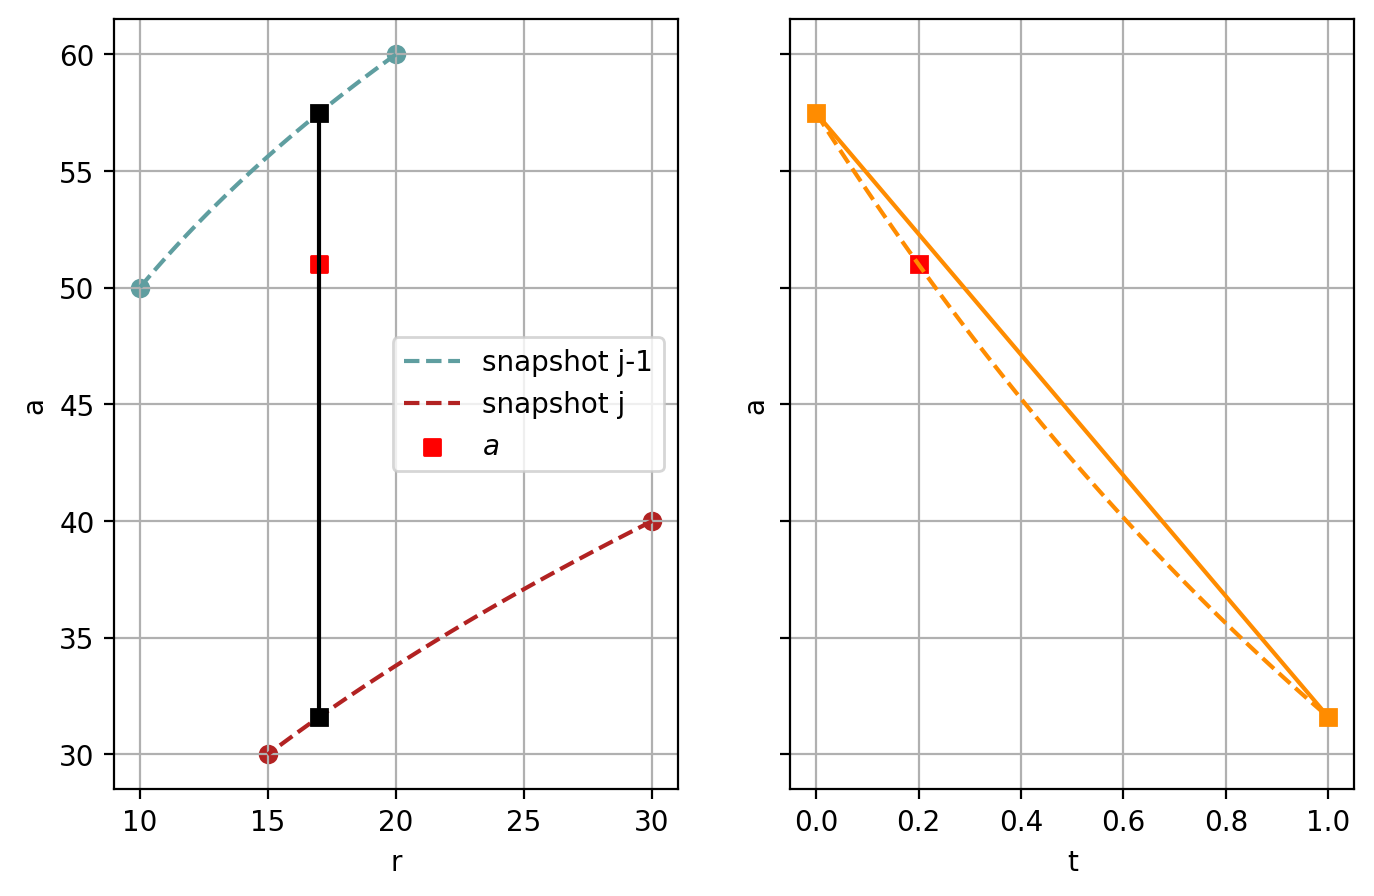

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# gets the power law slope between two points (in linear space)
def get_log_slope(y1, y2, x1, x2):
    return (np.log10(y2) - np.log10(y1)) / (np.log10(x2) - np.log10(x1))

# returns the power law given a point on the line and the power law slope
def log_point_slope(x, yk, xk, mk):
    return np.log10(yk) + mk * (np.log10(x) - np.log10(xk))

# returns the power law given that the x-axis is linear scale
def semilog_point_slope(x, yk, xk, mk):
    return np.log10(yk) + mk * (x - xk)

# evaluate the accelerations at the specified radius

r = 17.
t = 0.2

# discrete points

# i is the snapshot number, j = i+1
t_i = 0.
t_j = 1.

# for ith snapshot, get radii and accelerations
r_1i = 10.
r_2i = 20.

a_1i = 50.
a_2i = 60.

# for jth snapshot

r_1j = 15.
r_2j = 30.

a_1j = 30.
a_2j = 40.

# now get acceleration slopes m
m_i = get_log_slope(a_2i, a_1i, r_2i, r_1i)
m_j = get_log_slope(a_2j, a_1j, r_2j, r_1j)

log_a_i = log_point_slope(r, a_1i, r_1i, m_i)
log_a_j = log_point_slope(r, a_1j, r_1j, m_j)

# interpolate across time 

m_t = (log_a_j - log_a_i) / (t_j - t_i)
# evaluated_log_a = log_a_j + m_t * (t - t_j)
evaluated_log_a = semilog_point_slope(t, 10**log_a_j, t_j, m_t)

fig, ax = plt.subplots(1, 2, dpi=200, figsize=(8, 5), sharey=True)

arr_r_j = np.linspace(r_2j, r_1j, 100)
arr_r_i = np.linspace(r_2i, r_1i, 100)
arr_t   = np.linspace(t_i, t_j, 100)

ax[0].scatter([r_1i, r_2i], [a_1i, a_2i], marker='o', c='cadetblue')
ax[0].scatter([r_1j, r_2j], [a_1j, a_2j], marker='o', c='firebrick')

ax[0].plot(arr_r_i, 10**log_point_slope(arr_r_i, a_1i, r_1i, m_i),
           c='cadetblue', ls='--', label='snapshot j-1')

ax[0].plot(arr_r_j, 10**log_point_slope(arr_r_j, a_1j, r_1j, m_j),
           c='firebrick', ls='--', label='snapshot j')

ax[0].plot([r, r], [10**log_a_i, 10**log_a_j], c='k', marker='s')

ax[0].scatter([r], [10**evaluated_log_a], c='r', marker='s', label=r'$a$')
ax[0].set_xlabel('r')
ax[0].set_ylabel('a')
ax[0].legend()

ax[1].plot([t_i, t_j], [10**log_a_i, 10**log_a_j], marker='s', c='darkorange')
ax[1].plot([t], [10**evaluated_log_a], c='r', marker='s')
ax[1].plot(arr_t, 10**(log_a_j + m_t * (arr_t - t_j)), ls='--', c='darkorange')

ax[1].set_xlabel('t')
ax[1].set_ylabel('a')

ax[0].grid()
ax[1].grid()
# plt.savefig('test_plot.pdf', bbox_inches='tight')
plt.show()